### Implementing Linear Regression using a single Neuron

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline  

In [116]:
os.chdir("/Users/rahuljantwal/Desktop/git/LinearRegressionANN")
bike_df = pd.read_csv("./data/Bike-Sharing-Dataset/day.csv",delimiter=',')
N = np.shape(bike_df)[0]

In [117]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


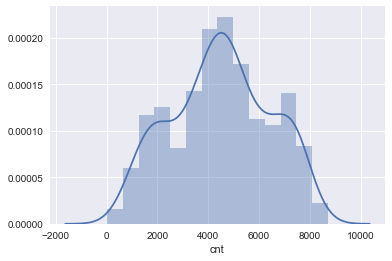

In [118]:
sns.distplot(bike_df['cnt'])

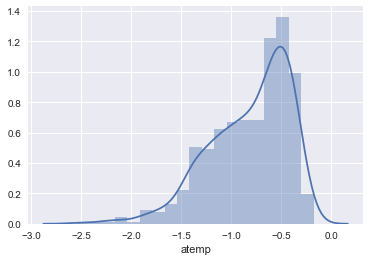

In [119]:
sns.distplot(np.log(bike_df['atemp']))

In [138]:
X = bike_df['atemp']
Y = bike_df['cnt']

In [140]:
def cost_function(X, Y, weight, bias):
    total_error = 0.0
    for i in range(len(X)):
        total_error += (Y[i] - (weight*X[i] + bias))**2
    return total_error / len(X)

In [141]:
def update_weights(X, Y, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0

    for i in range(len(X)):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*X[i] * (Y[i] - (weight*X[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(Y[i] - (weight*X[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / len(X)) * learning_rate
    bias -= (bias_deriv / len(X)) * learning_rate

    return weight, bias

In [148]:
def train(X, Y, weight, bias, learning_rate, iters):
    cost_history = []
    weight_history = []
    bias_history = []
    for i in range(iters):
        weight,bias = update_weights(X, Y, weight, bias, learning_rate)
        #Calculate cost for auditing purposes
        cost = cost_function(X, Y, weight,bias)
        cost_history.append(cost)
        weight_history.append(weight)
        bias_history.append(weight)
        # Log Progress
        #if i % 10 == 0:
        print ("iter: "+str(i) + " cost: "+str(cost) + " weight: "+str(weight) + " bias: "+str(bias))

    return weight, bias, cost_history, weight_history, bias_history

In [170]:
w = np.array([0, 0])
up_weight, up_bias, cost_hist, weight_hist, bias_hist = train(X,Y,w[0],w[1],0.05,6000)

iter: 0 cost: 2255175.010224036 weight: 7501.060062347977 bias: 945.1219568377976
iter: 1 cost: 2255174.743416656 weight: 7501.112828866118 bias: 945.2288689103823
iter: 2 cost: 2255174.538202764 weight: 7501.159196722128 bias: 945.3225867748738
iter: 3 cost: 2255174.3803625484 weight: 7501.199952735183 bias: 945.4047333751719
iter: 4 cost: 2255174.2589590587 weight: 7501.235786948466 bias: 945.4767320377048
iter: 5 cost: 2255174.16558032 weight: 7501.267304532332 bias: 945.5398310237844
iter: 6 cost: 2255174.0937563926 weight: 7501.295036223406 bias: 945.595125062094
iter: 7 cost: 2255174.0385110136 weight: 7501.319447479714 bias: 945.6435742327454
iter: 8 cost: 2255173.996016782 weight: 7501.34094650975 bias: 945.6860205286519
iter: 9 cost: 2255173.963329909 weight: 7501.359891314002 bias: 945.7232023799025
iter: 10 cost: 2255173.938186223 weight: 7501.376595860383 bias: 945.7557673916823
iter: 11 cost: 2255173.918844271 weight: 7501.391335500107 bias: 945.7842835154636
iter: 12 cost

iter: 100 cost: 2255173.8534529977 weight: 7501.551064867294 bias: 945.9611234531367
iter: 101 cost: 2255173.853443818 weight: 7501.551674911335 bias: 945.9608279638402
iter: 102 cost: 2255173.8534346754 weight: 7501.552283627485 bias: 945.960533085791
iter: 103 cost: 2255173.853425578 weight: 7501.552891020151 bias: 945.9602388208533
iter: 104 cost: 2255173.853416517 weight: 7501.55349709354 bias: 945.959945170496
iter: 105 cost: 2255173.8534074957 weight: 7501.5541018516815 bias: 945.9596521358415
iter: 106 cost: 2255173.853398511 weight: 7501.554705298453 bias: 945.9593597177088
iter: 107 cost: 2255173.853389564 weight: 7501.555307437595 bias: 945.9590679166511
iter: 108 cost: 2255173.8533806577 weight: 7501.555908272727 bias: 945.9587767329888
iter: 109 cost: 2255173.8533717906 weight: 7501.556507807362 bias: 945.9584861668386
iter: 110 cost: 2255173.853362963 weight: 7501.557106044921 bias: 945.9581962181388
iter: 111 cost: 2255173.85335417 weight: 7501.557702988739 bias: 945.9579

iter: 198 cost: 2255173.8527178965 weight: 7501.604999138468 bias: 945.9349778819329
iter: 199 cost: 2255173.85271188 weight: 7501.60549279009 bias: 945.9347385560912
iter: 200 cost: 2255173.8527058964 weight: 7501.605985377323 bias: 945.9344997462721
iter: 201 cost: 2255173.8526999312 weight: 7501.606476902464 bias: 945.934261451363
iter: 202 cost: 2255173.852693999 weight: 7501.606967367803 bias: 945.9340236702537
iter: 203 cost: 2255173.852688089 weight: 7501.607456775624 bias: 945.9337864018364
iter: 204 cost: 2255173.852682205 weight: 7501.607945128208 bias: 945.9335496450055
iter: 205 cost: 2255173.8526763464 weight: 7501.608432427829 bias: 945.9333133986582
iter: 206 cost: 2255173.852670513 weight: 7501.6089186767595 bias: 945.9330776616938
iter: 207 cost: 2255173.852664705 weight: 7501.6094038772635 bias: 945.9328424330139
iter: 208 cost: 2255173.8526589186 weight: 7501.609888031602 bias: 945.9326077115225
iter: 209 cost: 2255173.8526531598 weight: 7501.610371142031 bias: 945.9

iter: 296 cost: 2255173.8522363766 weight: 7501.648649847105 bias: 945.913815705683
iter: 297 cost: 2255173.852232439 weight: 7501.6490493812 bias: 945.9136220086913
iter: 298 cost: 2255173.852228515 weight: 7501.6494480538395 bias: 945.9134287293397
iter: 299 cost: 2255173.8522246126 weight: 7501.64984586688 bias: 945.9132358667275
iter: 300 cost: 2255173.852220723 weight: 7501.650242822177 bias: 945.9130434199562
iter: 301 cost: 2255173.8522168533 weight: 7501.6506389215765 bias: 945.9128513881293
iter: 302 cost: 2255173.852212997 weight: 7501.651034166926 bias: 945.9126597703522
iter: 303 cost: 2255173.852209159 weight: 7501.651428560068 bias: 945.9124685657318
iter: 304 cost: 2255173.852205339 weight: 7501.651822102838 bias: 945.9122777733776
iter: 305 cost: 2255173.852201536 weight: 7501.652214797071 bias: 945.9120873924005
iter: 306 cost: 2255173.8521977444 weight: 7501.652606644595 bias: 945.9118974219135
iter: 307 cost: 2255173.8521939716 weight: 7501.652997647237 bias: 945.911

iter: 395 cost: 2255173.8519183854 weight: 7501.6843016572675 bias: 945.8965314527109
iter: 396 cost: 2255173.851915814 weight: 7501.684624320671 bias: 945.8963750231811
iter: 397 cost: 2255173.8519132566 weight: 7501.684946288364 bias: 945.8962189309372
iter: 398 cost: 2255173.8519107136 weight: 7501.685267561846 bias: 945.8960631752516
iter: 399 cost: 2255173.8519081757 weight: 7501.685588142614 bias: 945.8959077553989
iter: 400 cost: 2255173.8519056467 weight: 7501.68590803216 bias: 945.8957526706548
iter: 401 cost: 2255173.8519031378 weight: 7501.686227231977 bias: 945.895597920297
iter: 402 cost: 2255173.8519006325 weight: 7501.686545743551 bias: 945.8954435036042
iter: 403 cost: 2255173.8518981407 weight: 7501.686863568365 bias: 945.8952894198574
iter: 404 cost: 2255173.851895657 weight: 7501.6871807079015 bias: 945.8951356683382
iter: 405 cost: 2255173.8518931884 weight: 7501.687497163637 bias: 945.8949822483305
iter: 406 cost: 2255173.8518907255 weight: 7501.687812937046 bias: 

iter: 494 cost: 2255173.851710984 weight: 7501.713094029567 bias: 945.8825727043543
iter: 495 cost: 2255173.8517093076 weight: 7501.713354612265 bias: 945.882446371996
iter: 496 cost: 2255173.851707642 weight: 7501.713614633107 bias: 945.8823203120293
iter: 497 cost: 2255173.8517059786 weight: 7501.713874093304 bias: 945.8821945238668
iter: 498 cost: 2255173.851704325 weight: 7501.714132994066 bias: 945.8820690069226
iter: 499 cost: 2255173.851702675 weight: 7501.714391336599 bias: 945.881943760612
iter: 500 cost: 2255173.8517010375 weight: 7501.714649122106 bias: 945.8818187843514
iter: 501 cost: 2255173.8516994067 weight: 7501.714906351788 bias: 945.8816940775584
iter: 502 cost: 2255173.8516977774 weight: 7501.7151630268445 bias: 945.8815696396522
iter: 503 cost: 2255173.851696163 weight: 7501.715419148471 bias: 945.8814454700529
iter: 504 cost: 2255173.851694548 weight: 7501.71567471786 bias: 945.881321568182
iter: 505 cost: 2255173.8516929457 weight: 7501.715929736203 bias: 945.881

iter: 593 cost: 2255173.851575717 weight: 7501.736346725543 bias: 945.8712996307656
iter: 594 cost: 2255173.8515746216 weight: 7501.736557171913 bias: 945.8711976048578
iter: 595 cost: 2255173.8515735343 weight: 7501.736767164529 bias: 945.8710957989333
iter: 596 cost: 2255173.851572449 weight: 7501.736976704369 bias: 945.8709942125179
iter: 597 cost: 2255173.8515713713 weight: 7501.73718579241 bias: 945.870892845138
iter: 598 cost: 2255173.8515702966 weight: 7501.737394429625 bias: 945.8707916963214
iter: 599 cost: 2255173.8515692274 weight: 7501.737602616987 bias: 945.8706907655969
iter: 600 cost: 2255173.851568159 weight: 7501.737810355465 bias: 945.8705900524943
iter: 601 cost: 2255173.8515671026 weight: 7501.738017646027 bias: 945.8704895565446
iter: 602 cost: 2255173.8515660465 weight: 7501.738224489641 bias: 945.8703892772793
iter: 603 cost: 2255173.851564993 weight: 7501.738430887268 bias: 945.8702892142312
iter: 604 cost: 2255173.8515639477 weight: 7501.73863683987 bias: 945.8

iter: 692 cost: 2255173.851487487 weight: 7501.755125583519 bias: 945.8621955058895
iter: 693 cost: 2255173.8514867756 weight: 7501.755295539832 bias: 945.862113109851
iter: 694 cost: 2255173.8514860664 weight: 7501.755465129695 bias: 945.8620308914709
iter: 695 cost: 2255173.8514853595 weight: 7501.755634353896 bias: 945.861948850366
iter: 696 cost: 2255173.8514846563 weight: 7501.755803213225 bias: 945.8618669861542
iter: 697 cost: 2255173.851483957 weight: 7501.755971708466 bias: 945.8617852984538
iter: 698 cost: 2255173.8514832584 weight: 7501.756139840407 bias: 945.8617037868845
iter: 699 cost: 2255173.8514825623 weight: 7501.7563076098295 bias: 945.8616224510666
iter: 700 cost: 2255173.851481872 weight: 7501.756475017516 bias: 945.861541290621
iter: 701 cost: 2255173.851481184 weight: 7501.756642064246 bias: 945.8614603051694
iter: 702 cost: 2255173.851480498 weight: 7501.756808750798 bias: 945.8613794943349
iter: 703 cost: 2255173.8514798144 weight: 7501.7569750779485 bias: 945.

iter: 791 cost: 2255173.851429948 weight: 7501.770291373638 bias: 945.8548430221936
iter: 792 cost: 2255173.851429484 weight: 7501.770428630216 bias: 945.8547764792213
iter: 793 cost: 2255173.8514290187 weight: 7501.770565590848 bias: 945.8547100797258
iter: 794 cost: 2255173.8514285586 weight: 7501.770702256172 bias: 945.8546438233975
iter: 795 cost: 2255173.851428099 weight: 7501.770838626825 bias: 945.854577709928
iter: 796 cost: 2255173.8514276394 weight: 7501.770974703442 bias: 945.8545117390091
iter: 797 cost: 2255173.8514271844 weight: 7501.771110486658 bias: 945.8544459103334
iter: 798 cost: 2255173.851426735 weight: 7501.771245977104 bias: 945.8543802235944
iter: 799 cost: 2255173.8514262834 weight: 7501.771381175412 bias: 945.8543146784859
iter: 800 cost: 2255173.851425835 weight: 7501.771516082213 bias: 945.8542492747026
iter: 801 cost: 2255173.851425386 weight: 7501.771650698134 bias: 945.8541840119397
iter: 802 cost: 2255173.8514249437 weight: 7501.771785023803 bias: 945.8

iter: 889 cost: 2255173.85139272 weight: 7501.782428165332 bias: 945.848959018634
iter: 890 cost: 2255173.8513924163 weight: 7501.782539253152 bias: 945.8489051624626
iter: 891 cost: 2255173.851392113 weight: 7501.782650101451 bias: 945.8488514224134
iter: 892 cost: 2255173.851391811 weight: 7501.782760710744 bias: 945.8487977982359
iter: 893 cost: 2255173.8513915106 weight: 7501.782871081547 bias: 945.8487442896802
iter: 894 cost: 2255173.8513912116 weight: 7501.782981214373 bias: 945.848690896497
iter: 895 cost: 2255173.851390912 weight: 7501.783091109736 bias: 945.8486376184377
iter: 896 cost: 2255173.851390617 weight: 7501.783200768148 bias: 945.8485844552538
iter: 897 cost: 2255173.8513903236 weight: 7501.783310190121 bias: 945.8485314066977
iter: 898 cost: 2255173.851390025 weight: 7501.783419376163 bias: 945.8484784725224
iter: 899 cost: 2255173.8513897317 weight: 7501.783528326783 bias: 945.8484256524812
iter: 900 cost: 2255173.8513894426 weight: 7501.783637042489 bias: 945.848

iter: 987 cost: 2255173.851368336 weight: 7501.792251007767 bias: 945.8441968342515
iter: 988 cost: 2255173.851368135 weight: 7501.792340916055 bias: 945.8441532460697
iter: 989 cost: 2255173.85136794 weight: 7501.792430630487 bias: 945.8441097518705
iter: 990 cost: 2255173.851367742 weight: 7501.792520151481 bias: 945.8440663514515
iter: 991 cost: 2255173.8513675416 weight: 7501.792609479454 bias: 945.8440230446101
iter: 992 cost: 2255173.851367348 weight: 7501.792698614822 bias: 945.8439798311449
iter: 993 cost: 2255173.851367153 weight: 7501.792787558002 bias: 945.8439367108545
iter: 994 cost: 2255173.8513669595 weight: 7501.792876309406 bias: 945.8438936835379
iter: 995 cost: 2255173.8513667653 weight: 7501.792964869449 bias: 945.8438507489947
iter: 996 cost: 2255173.851366574 weight: 7501.793053238543 bias: 945.8438079070249
iter: 997 cost: 2255173.8513663835 weight: 7501.793141417099 bias: 945.8437651574288
iter: 998 cost: 2255173.8513661902 weight: 7501.793229405529 bias: 945.84

In [159]:
tt = np.linspace(np.min(bike_df['atemp']), np.max(bike_df['atemp']), 100)
bf_line = w[0]+w[1]*tt

In [171]:
tt = np.linspace(np.min(bike_df['atemp']), np.max(bike_df['atemp']), 100)
bf_line = up_bias+up_weight*tt

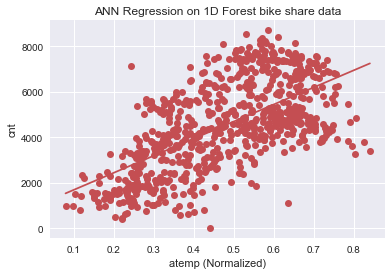

In [172]:
plt.plot(bike_df['atemp'],bike_df['cnt'], 'ro', tt, bf_line, 'r-')
plt.xlabel('atemp (Normalized)')
plt.ylabel('cnt')
plt.title('ANN Regression on 1D Bike Share data')
 
plt.savefig('bike.png')
 
plt.show()

In [178]:
print(up_weight, up_bias)

7501.793317204243 945.8436799345618


In [38]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(bike_df['atemp'].values.reshape(-1,1),bike_df['cnt'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
regr.score(bike_df['atemp'].values.reshape(-1,1),bike_df['cnt'])

0.3982439175261369

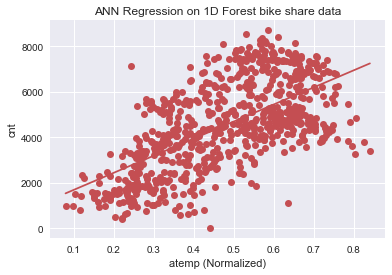

In [84]:
tt = np.linspace(np.min(bike_df['atemp']), np.max(bike_df['atemp']), 100)
bf_line = regr.intercept_+regr.coef_*tt
plt.plot(bike_df['atemp'],bike_df['cnt'], 'ro', tt, bf_line, 'r-')
plt.xlabel('atemp (Normalized)')
plt.ylabel('cnt')
plt.title('ANN Regression on 1D Bike Share data')
 
plt.savefig('bike.png')
 
plt.show()

In [175]:
print(regr.coef_, regr.intercept_)

[7501.83394952] 945.823981098491
